EDA FOR HAR INCOMING SPECTROGRAMS   

In [1]:
import numpy
import matplotlib
import tensorflow as tf
import cv2
import os

In [2]:
#!pip3 freeze

In [3]:
import os
os.environ["TF_MIN_GPU_MULTIPROCESSOR_COUNT"]="2"
#os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [5]:
tf.__version__

'2.10.0'

In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9329219487131876566
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1755224475
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16648295460808368149
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [7]:
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import cv2
#import imgaug cant install because pythn is 3.9
#.augmenters as iaa

label = ['05' ,  '06' , '07' , '08' , '09' , '10' , '11' ,'16' , '17' , '18' , '19']

dirname1 = []
filename1 = []
fullpath = []
for dirname, _, filenames in os.walk("C:/Users/avina/Downloads/77"):
    for filename in filenames:
        dirname1.append((dirname))
        filename1.append(filename)
        fullpath.append((os.path.join(dirname, filename)))


df = pd.DataFrame(columns=['path' , 'label' ])
label1 = []
path = []
def create_dataframe(fullpath,label):
            
    for i in range(len(fullpath)):
        for j in range(len(label)):
            if (fullpath[i].split('/')[4][29:31]== label[j]):
                path.append(fullpath[i])
                label1.append(label[j])
    
           
    return path,label1  

path,label2=create_dataframe(fullpath,label)
df['path'] = path
df['label'] = label2
final = pd.DataFrame(df)
final.iloc[638]
   

path     C:/Users/avina/Downloads/77\activity_spectogra...
label                                                   19
Name: 638, dtype: object

In [8]:
labelname = []
classvalue = []

for i in range(len(df)):
    for j in range(len(label)):
        if (df['label'][i] ==  label[j]):
            if (label[j] == '05'):
                labelname.append('Walkingtowards')
                classvalue.append('00')
            elif (label[j] =='06'):
                labelname.append('walkingaway')
                classvalue.append('01')
            elif (label[j] =='07'):
                labelname.append('pickingobject')
                classvalue.append('02')
            elif (label[j] =='08'):
                labelname.append('bending')
                classvalue.append('03')
            elif (label[j] =='09'):
                labelname.append('sitting')
                classvalue.append('04')
            elif (label[j] =='10'):
                labelname.append('kneeling')
                classvalue.append('05')
            elif (label[j] =='11'):
                labelname.append('crawling')
                classvalue.append('06')
            elif (label[j] =='16'):
                labelname.append('walkingontoes')
                classvalue.append('07')
            elif (label[j] =='17'):
                labelname.append('limping')
                classvalue.append('08')
            elif (label[j] =='18'):
                labelname.append('shortsteps')
                classvalue.append('09')
            else :
                labelname.append('scissorsgait')
                classvalue.append('10')

df['labelname'] = labelname
df['classvalue'] = classvalue



for i in range(len(df)-1):
    path = df['path'].iloc[i]
    if(path == 'C:/Users/avina/Downloads/77\\activity_spectogram_77GHz\\08_bending\\activity_spectogram_77GHz - Shortcut.lnk'):
        df.drop(index = i,axis =0,inplace = True)
        print('del')


del


In [9]:
import seaborn as sns
import nbformat
import plotly.express as px
fig = px.histogram(df, x=df['classvalue'])
fig.show()

In [10]:
y_train = df['classvalue']
y_train
y_train = y_train.to_numpy()

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(df,y_train, test_size = 0.20 , shuffle = True,random_state = 42,stratify=y_train)

In [12]:

def create_data(x_train,y_train):
    listimage = []
    
    for i in range(len(x_train)):
        path = x_train['path'].iloc[i]

        image = cv2.imread(path)
        image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
     
        listimage.append(image)
       
            
    
    return  listimage

x_train_resize = create_data(x_train,y_train)

x_train_resize_1 = np.array(x_train_resize)


len(x_train_resize_1)
        

518

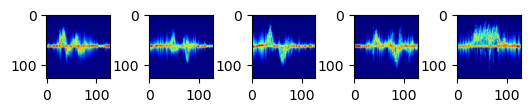

In [13]:
for i in range(5):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train_resize_1[i])

plt.show()


Train Data Visualization

In [14]:
fig = px.histogram(x_train, x=y_train)
fig.show()

In [15]:
import sklearn
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_train_1 = x_train_resize_1.reshape((x_train_resize_1.shape[0],x_train_resize_1.shape[1]*x_train_resize_1.shape[2]*x_train_resize_1.shape[3]))#train_dataset.reshape((nsamples,nx*ny))
X_2d = tsne.fit_transform(x_train_1)

c:\Users\avina\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\avina\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



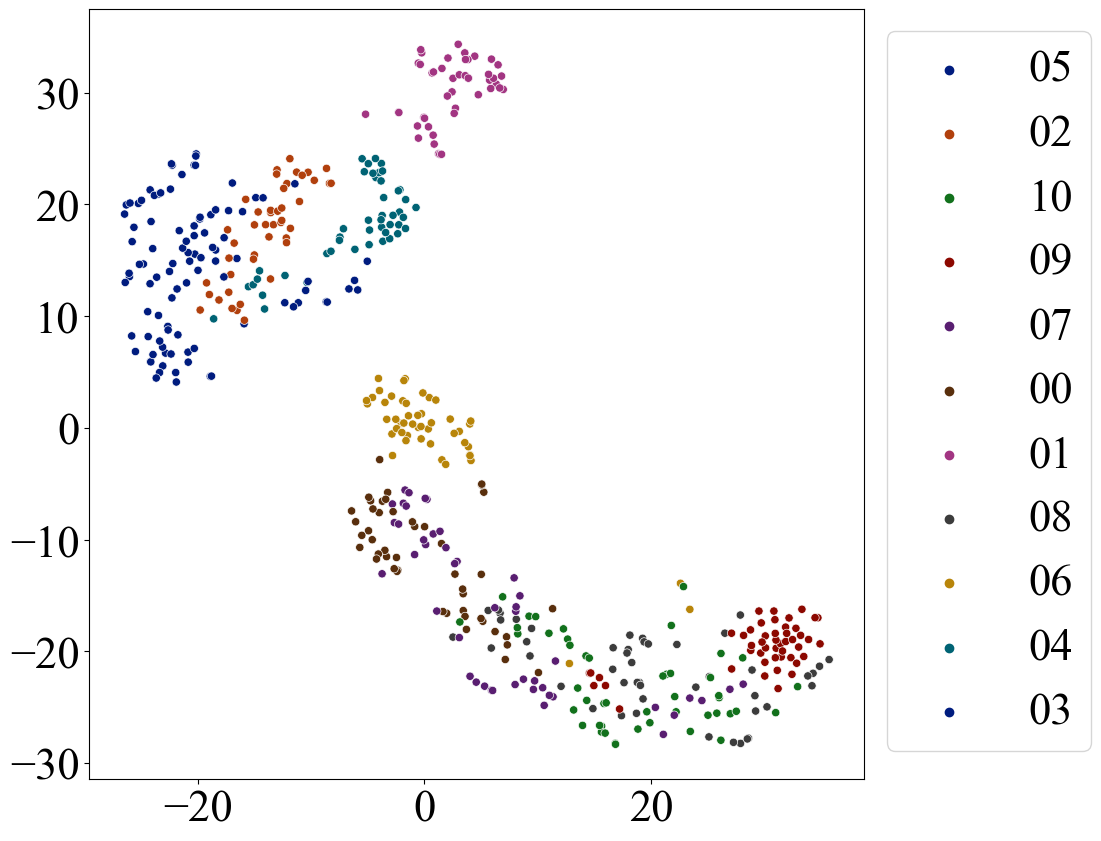

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,10))
fs = 32

plt.rcParams.update({'font.size': fs})
plt.rcParams["font.family"] = "Times New Roman"

t=sns.scatterplot(
    x=X_2d[:,0], y=X_2d[:,1],
    hue=np.squeeze(y_train),
    palette=sns.color_palette("dark", 11),
    alpha=1,sizes=(500, 500),color=".2"
)
sns.move_legend( t,loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig('train.pdf' ,bbox_inches='tight')
plt.show()

In [17]:

def create_data(x_train,y_train):
    listimage = []
    
    for i in range(len(x_train)):
        path = x_train['path'].iloc[i]

        image = cv2.imread(path)
        image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
     
        listimage.append(image)
       
            
    
    return  listimage

x_test_resize = create_data(x_test,y_test)

x_test_resize_1 = np.array(x_test_resize)


len(x_test_resize_1)
        

130

Test samples Visualization  

In [18]:
fig = px.histogram(x_test, x=y_test)
fig.show()

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_train_1 = x_test_resize_1.reshape((x_test_resize_1.shape[0],x_test_resize_1.shape[1]*x_test_resize_1.shape[2]*x_test_resize_1.shape[3]))#train_dataset.reshape((nsamples,nx*ny))
X_2d = tsne.fit_transform(x_train_1)

c:\Users\avina\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\avina\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



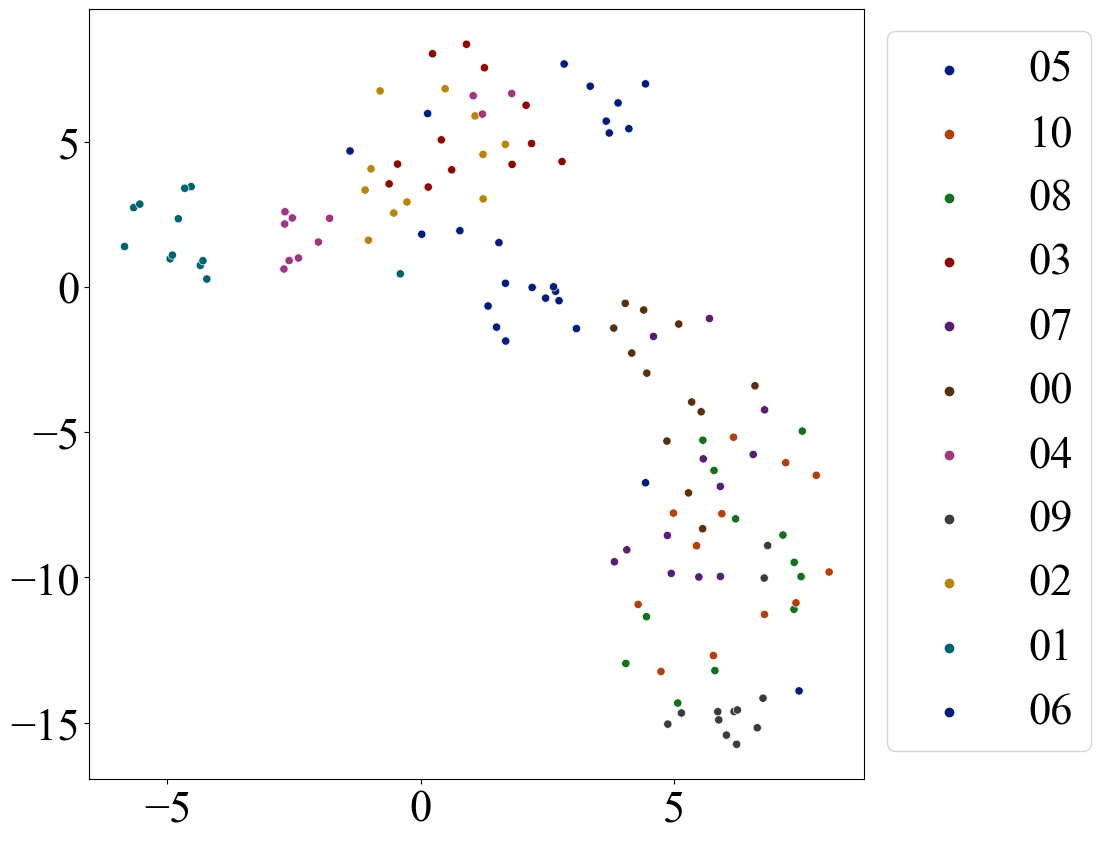

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,10))
fs = 32

plt.rcParams.update({'font.size': fs})
plt.rcParams["font.family"] = "Times New Roman"

t=sns.scatterplot(
    x=X_2d[:,0], y=X_2d[:,1],
    hue=np.squeeze(y_test),
    palette=sns.color_palette("dark", 11),
    alpha=1,sizes=(500, 500),color=".2"
)
sns.move_legend( t,loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig('test.pdf' ,bbox_inches='tight')
plt.show()

In [21]:
os.getcwd()

'c:\\Users\\avina\\HAR_END_TO_END\\notebook\\data'

In [29]:
from datetime import datetime
logdir = "C:\\Users\\avina\\HAR_END_TO_END\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Creates a file writer for the log directory.
file_writer = tf.summary.create_file_writer(logdir)
with file_writer.as_default():
  # Don't forget to reshape.
  images = x_test_resize_1[:25]
  tf.summary.image("25 training data examples", images, max_outputs=25, step=0)


In [23]:
from google.cloud.aiplatform.training_utils import cloud_profiler

In [24]:
%load_ext tensorboard
# Start TensorBoard.
%tensorboard --logdir C:\\Users\\avina\\HAR_END_TO_END

In [30]:
%tensorboard --logdir C:\\Users\\avina\\HAR_END_TO_END\\tensorboard_logs20230404-231035

In [26]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [27]:
%load_ext tensorboard
%tensorboard --logdir logs

In [28]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU
